In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

from pylab import rcParams
rcParams['figure.figsize'] = 8, 8

In [68]:
data = pd.read_csv("creditcard.csv")

In [69]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [70]:
data.shape

(284807, 31)

In [71]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [72]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0, stratify = Y)
#X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0,stratify=Y)

In [103]:
print("The shape of train dataset:")
print(X_train.shape)
print("\n The shape of test dataset :")
print(X_test.shape)

The shape of train dataset:
(227845, 30)

 The shape of test dataset :
(56962, 30)


In [104]:
pip install xgboost

In [105]:
import xgboost as xgb

In [106]:
dtrain=xgb.DMatrix(X_train,label=Y_train)
dtest=xgb.DMatrix(X_test)

In [107]:
parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}

In [108]:
num_round=50
from datetime import datetime
start=datetime.now()
xg=xgb.train(parameters,dtrain,num_round)
stop=datetime.now()

C:\Users\Dell\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [09:48:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


In [109]:
train_class_preds_probs=xg.predict(dtrain)
test_class_preds_probs=xg.predict(dtest)

In [110]:
len(train_class_preds_probs)

227845

In [111]:
train_class_preds=[]
test_class_preds=[]
for i in range(0,len(train_class_preds_probs)):
    if train_class_preds_probs[i]>=0.5:
        train_class_preds.append(1)
    else:
        train_class_preds.append(0)
        
for i in range(0,len(test_class_preds_probs)):
    if test_class_preds_probs[i]>=0.5:
        test_class_preds.append(1)
    else:
        test_class_preds.append(0)

In [112]:
test_class_preds_probs[:20]

array([0.00995724, 0.00995724, 0.00995724, 0.00995724, 0.00995724,
       0.00995724, 0.01013789, 0.00995724, 0.00995724, 0.00995724,
       0.00995724, 0.00995724, 0.00995724, 0.00995724, 0.00995724,
       0.00995724, 0.00995724, 0.00995724, 0.00995724, 0.00995724],
      dtype=float32)

In [113]:
len(Y_train)

227845

In [114]:
len(train_class_preds)

227845

In [115]:
train_accuracy_xgb=accuracy_score(train_class_preds,Y_train)
test_accuracy_xgb=accuracy_score(test_class_preds,Y_test)

print("The accuracy on train data is:",train_accuracy_xgb)
print("The accuracy on test data is:",test_accuracy_xgb)

The accuracy on train data is: 0.9997147183392219
The accuracy on test data is: 0.999385555282469


In [116]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report,confusion_matrix
test_accuracy_xgb=accuracy_score(test_class_preds,Y_test)
test_precision_xgb=precision_score(test_class_preds,Y_test)
test_recall_score_xgb=recall_score(test_class_preds,Y_test)
test_f1_score_xgb = f1_score(test_class_preds,Y_test)
test_roc_score_xgb = roc_auc_score(test_class_preds,Y_test)

print("The accuracy on test data is ", test_accuracy_xgb)
print("The precision on test data is ", test_precision_xgb)
print("The recall on test data is ", test_recall_score_xgb)
print("The f1 on test data is ", test_f1_score_xgb)
print("The roc_score on train data is ", test_roc_score_xgb)

The accuracy on test data is  0.999385555282469
The precision on test data is  0.7142857142857143
The recall on test data is  0.9090909090909091
The f1 on test data is  0.8
The roc_score on train data is  0.9542993439714896


In [117]:
from xgboost import XGBClassifier
param_test1={
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}
gsearch1=GridSearchCV(estimator=XGBClassifier(learning_rate=0.1,n_Estimators=140,max_depth=5,
min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,
objective='binary:logistic',nthread=4,scale_pos_weight=1,seed=27),
param_grid=param_test1,scoring='accuracy',n_jobs=-1,verbose=2)
gsearch1.fit(X_train,Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\Dell\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [09:51:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_Estimators" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_Estimators=140,
                                     n_estimators=None, n_jobs=None, nthread=4, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='accuracy', verbose=2)

In [118]:
gsearch1.best_score_

0.9995830498804011

In [119]:
optimal_xgb=gsearch1.best_estimator_

In [120]:
train_class_preds=optimal_xgb.predict(X_train)
test_class_preds=optimal_xgb.predict(X_test)

In [121]:
train_accuracy_xgb_tuned=accuracy_score(train_class_preds,Y_train)
test_accuracy_xgb_tuned=accuracy_score(test_class_preds,Y_test)

print("The accuracy on train data is ",train_accuracy_xgb_tuned)
print("The accuracy on test data is ",test_accuracy_xgb_tuned)

The accuracy on train data is  0.9997366630823586
The accuracy on test data is  0.9994382219725431


In [122]:
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,Y_test)
test_precision_xgb_tuned = precision_score(test_class_preds,Y_test)
test_recall_score_xgb_tuned = recall_score(test_class_preds,Y_test)
test_f1_score_xgb_tuned = f1_score(test_class_preds,Y_test)
test_roc_score_xgb_tuned = roc_auc_score(test_class_preds,Y_test)

print("The accuracy on test data is ", test_accuracy_xgb_tuned)
print("The precision on test data is ", test_precision_xgb_tuned)
print("The recall on test data is ", test_recall_score_xgb_tuned)
print("The f1 on test data is ", test_f1_score_xgb_tuned)
print("The roc_score on test data is ", test_roc_score_xgb_tuned)

The accuracy on test data is  0.9994382219725431
The precision on test data is  0.7346938775510204
The recall on test data is  0.9230769230769231
The f1 on test data is  0.8181818181818182
The roc_score on test data is  0.9613099262737124


In [123]:
pd.DataFrame(optimal_xgb.feature_importances_,
                                
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]

,importance_xgb
14,0.285102
10,0.171440
17,0.059188
12,0.059153
7,0.057552
4,0.025797
27,0.024072
16,0.022094
0,0.019071
8,0.017564


In [124]:
feature_importances_xgb = pd.DataFrame(optimal_xgb.feature_importances_,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]

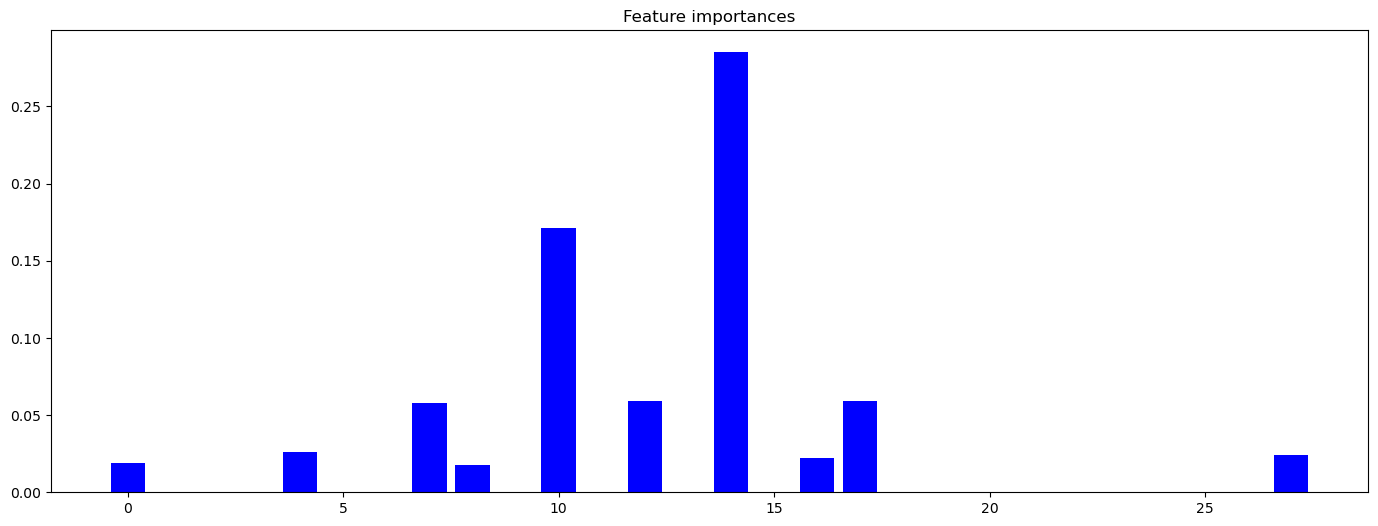

In [125]:
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_xgb.index,feature_importances_xgb['importance_xgb'],
       color="b",align="center")
plt.show()

In [126]:
y_preds_proba_xgb=optimal_xgb.predict_proba(X_test)[::,1]

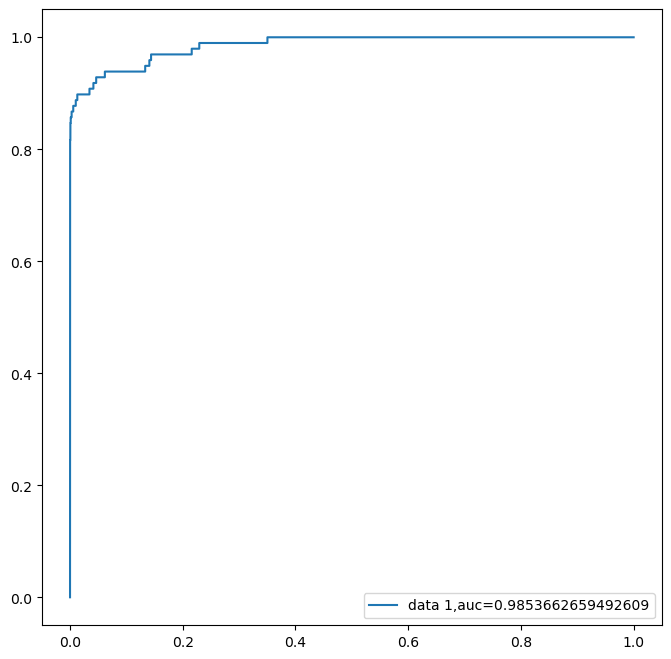

In [102]:
import sklearn.metrics as metrics
y_pred_proba=y_preds_proba_xgb
fpr,tpr,_=metrics.roc_curve(Y_test,y_pred_proba)
auc=metrics.roc_auc_score(Y_test,y_pred_proba)
plt.plot(fpr,tpr,label="data 1,auc=" +str(auc))
plt.legend(loc=4)
plt.show()